In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('train_spam.csv', encoding='utf8')
test = pd.read_csv('test_spam.csv', encoding='utf8')
train

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...
...,...,...
16273,spam,if you are interested in binary options tradin...
16274,spam,dirty pictureblyk on aircel thanks you for bei...
16275,ham,or you could do this g on mon 1635465 sep 1635...
16276,ham,insta reels par 80 गंद bhara pada hai 👀 kuch b...


In [2]:
train.isnull().sum()

text_type    0
text         0
dtype: int64

In [3]:
train['text_type'].value_counts()

text_type
ham     11469
spam     4809
Name: count, dtype: int64

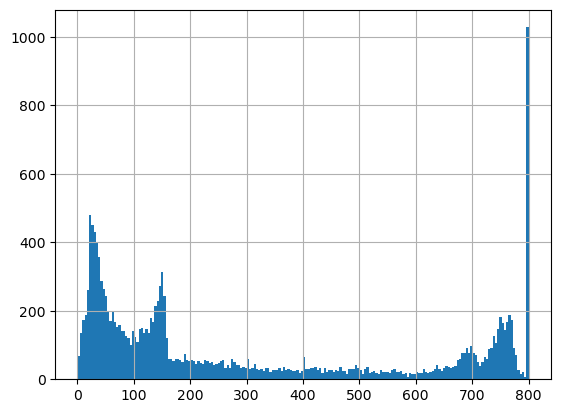

In [4]:
train['text'].str.len().hist(bins=200);

In [5]:
y_0 = train[train['text_type'] == 'ham']['text'].str.len().values
y_1 = train[train['text_type'] == 'spam']['text'].str.len().values
y_1.shape

(4809,)

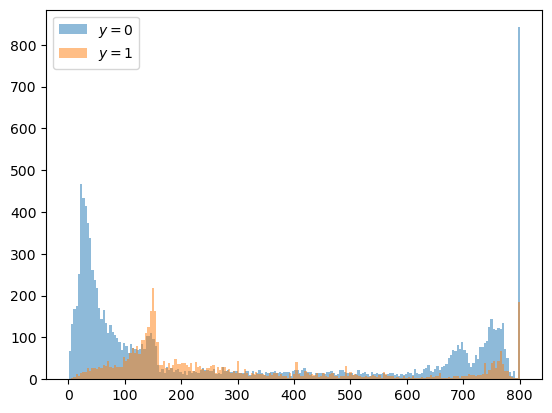

In [6]:
plt.hist(y_0, alpha=0.5, bins=200, label=r'$y = 0$')
plt.hist(y_1, alpha=0.5, bins=200, label=r'$y = 1$')
plt.legend();

In [7]:
train[train['text'].str.len() == 800]['text'].iloc[0]

'welcome to jefferson pilot s gateway to wealth as one of the industry s premier producers you must continually seek qualified cutting edge services financial profiles concept profiles professional is a personal and business analysis tool that analyzes a client s insurance investment and financial planning goals to help them see their situation today compared to their objectives market profiles professional is an ideal tool for true financial planning it not only provides a thorough analysis including asset allocation but it can calculate tax implications in a client s plan due to its modular format it can be used for specific planning needs as well as more comprehensive planning benefits this software not only provides exceptional analysis but excels in providing simple as well as comprehe'

In [8]:
import re

uni = set()
for text in train["text"]:
    uni.update(re.split("(?:\w|\')+", text))
uni

{'',
 ' 🇮🇳 ',
 ' 🤖 °$∆•',
 ' ➖',
 '📈 ',
 '🎊',
 ' 💕 ',
 ' 💠💠💠💠💠💠💠💠💠',
 ' 📥 ',
 '  🔰 ',
 '⭕️ ⭕️➖ @',
 ' 📖 ',
 '👉 ',
 ' 👇👇👇👇👇👇👇👇👇👇 ',
 ': @',
 ' 🇰🇪🇰🇪🇰🇪 ',
 ' 💸💸💸 ',
 '❤️❤️ 💥💥',
 '🔰 📌',
 ' 🥺❤️',
 ' ━━━━━━━━━━━━━━━━━ ➠',
 '\ueebf\ueec0��?¡',
 ' ✅ ♻️',
 ' 🔷 ',
 '🔥 👿 ',
 '! ⚡ 💲',
 ' 💙 🆗',
 '😡',
 '🙏🙏',
 ' 🥵🥵 ',
 ' 👇👇👇✍✍✍',
 ' 📝',
 '💥 🔺',
 ' ‼️‼️ 💘',
 '👌',
 '👇👇👇👇 @',
 '₹₹₹₹',
 ' 🧨🧨🎃🎃 ',
 '  〰️‼️ ',
 '📌📎 ♠️♣️',
 ' 💸💸',
 ' ✅ 🔥',
 ' 👇👇👇👇👇💎💎💎💎💎💎💎💎💎💎💎💎💎💎💎💎👇👇👇👇👇👇👇 ',
 '\ueec4',
 ' ➖➖➖➖➖➖ 🛡',
 ' 🇮🇳 ⚠️',
 '͚ ☺? 🔄',
 ' 💯👌 💥',
 ' 💫 ◆━━━━━━━━▣✦▣━━━━━━━━━◆✅✔ ',
 ' ❤️ ✅ ',
 ' 🔥 🔝',
 '🔱 ',
 ' 💔 🤩 ',
 '😉 💰',
 ' ✨ ',
 ' 💥💥😱😱 ',
 '🎞 ',
 '‼️🥵💦💦 ',
 '! ',
 ' \x06 ',
 '় ',
 '\ueebe¥',
 ' 💦💦💦💦💦💦 ',
 ' !🤗🤳 📲',
 ' 🌟',
 ' 👌👌🤪🤪🤪 ',
 ' 🎲',
 '📍✘ ',
 ' ✈️',
 '️ ',
 '📉 📤📤 ',
 'ెం',
 '🌺 ',
 '❄️ 🔰 ',
 '… ',
 '💍 ',
 '🥀',
 ' 😍❤️',
 '🥺🥺',
 ' 💰🪙',
 '❤️❤️',
 '? ✔️',
 ' …',
 '👆🏼👆🏼',
 '🤞🤞 ',
 '🎨 ',
 ' 👇👇 ➖➖➖➖➖➖➖➖ ✅',
 ' 🔏',
 '❤',
 '✅✅ ',
 '🗡 ⚓️ ',
 '🎉🎉',
 ' 🔔',
 ' ⭐ ',
 ' ✔️ ',
 ' 👆👆👆👆👆👆 👇👇👇👇👇👇 👆👆👆👆👆👆 ',
 ' ♥️',
 ' 🧐🤔 ',
 '়া ',
 

In [9]:
train["text_type"] = train["text_type"].apply(lambda x: 1 if x=='spam' else 0)
train.head()

,text_type,text
0,0,make sure alex knows his birthday is over in f...
1,0,a resume for john lavorato thanks vince i will...
2,1,plzz visit my website moviesgodml to get all m...
3,1,urgent your mobile number has been awarded wit...
4,0,overview of hr associates analyst project per ...


In [10]:
X, y = train["text"], train["text_type"]

## Baseline

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11394,), (4884,), (11394,), (4884,))

In [12]:
y_test.value_counts()

text_type
0    3475
1    1409
Name: count, dtype: int64

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
X_train_vect.shape, X_test_vect.shape

((11394, 43525), (4884, 43525))

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

clf = LogisticRegression(penalty='l2', random_state=0)
clf.fit(X_train_vect, y_train)
predicted_1 = clf.predict_proba(X_test_vect)[:, 1]

print('Train:', roc_auc_score(y_train, clf.predict_proba(X_train_vect)[:, 1]), 'Test:', roc_auc_score(y_test, predicted_1))

Train: 0.9922317289437665 Test: 0.9725918172488269


In [15]:
def preprocessor(text):
    whitespaced_text = re.sub("[^a-z!:)(]", ' ', text.lower())
    return re.sub(' +', ' ',  whitespaced_text)

vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(2, 4), analyzer='char', preprocessor=preprocessor)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
X_train_vect.shape, X_test_vect.shape

((11394, 79000), (4884, 79000))

In [16]:
clf = LogisticRegression(penalty='l2', random_state=0)
clf.fit(X_train_vect, y_train)
predicted_2 = clf.predict_proba(X_test_vect)[:, 1]

print('Train:', roc_auc_score(y_train, clf.predict_proba(X_train_vect)[:, 1]), 'Test:', roc_auc_score(y_test, predicted_2))

Train: 0.9855328260901557 Test: 0.9683376648574681


# Буду усреднять ранги предсказаний разных комбинаций моделей и их вероятности 

## FastText

In [17]:
import fasttext

train_dataset = pd.concat([X_train.apply(lambda x: re.sub('\t', '', x)), 
                           y_train.apply(lambda x: '__label__' + str(x))], axis=1)

test_dataset = pd.concat([X_test.apply(lambda x: re.sub('\t', '', x)), 
                          y_test.apply(lambda x: '__label__' + str(x))], axis=1)

train_dataset.to_csv("train_fasttext.txt", sep='\t', header=None, index=None)
test_dataset.to_csv("test_fasttext.txt", sep='\t', header=None, index=None)

In [18]:
model_ft = fasttext.train_supervised(
    input="train_fasttext.txt",
    minCount=3, 
    minn=3, maxn=5,  
    wordNgrams=2, 
    dim=15,
    epoch=20,
    lr=0.1,
    seed=0,
    bucket=20**6
) 

In [19]:
X_ft_test_1 = [w.replace('\n', '') for w in list(X_test.values)]
ft_pred = model_ft.predict(X_ft_test_1)

for i in range(len(ft_pred[0])):
    if ft_pred[0][i] == ['__label__0']:
        ft_pred[1][i][0] = max(1 - ft_pred[1][i][0], 0)
    else:
        ft_pred[1][i][0] = min(ft_pred[1][i][0], 1)
        
roc_auc_score(y_test, ft_pred[1])

0.9863755610132191

In [20]:
X_test_rank = pd.DataFrame(data=X_test)
X_test_rank['ft'] = [i[0] for i in ft_pred[1]]
X_test_rank['ft_rank'] = X_test_rank['ft'].rank()
X_test_rank

,text,ft,ft_rank
13842,it s official i m a failure just finished list...,0.063311,2997.0
8122,visit with vince kaminski on may 4 th carol fo...,0.000064,968.5
10705,url url date 1635465 1635465 1635465t1635465 1...,0.001253,1603.0
9415,it just seems like weird timing that the night...,0.006732,2121.0
11161,splashmobile choose from 1000s of gr8 tones ea...,0.988570,4258.0
...,...,...,...
1343,not satisfied with ur existing bulk sms provid...,0.999771,4730.0
10547,here are 50 mx coins which you can use to watc...,0.985221,4210.0
12625,so now i can do what up ash,0.000000,330.0
2301,the installation of the equipment you ordered ...,0.003954,1924.0


## Bert (обучен в тетрадке bert_train, посчитаем его предказания для test еще раз)

In [21]:
import torch

device = torch.device('cuda')

In [22]:
from pytorch_transformers import AdamW, BertForSequenceClassification

bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

bert_model.load_state_dict(torch.load('bert.pt'))

bert_model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [23]:
X_bert_test = X_test.copy().apply(lambda x: '[CLS] ' + x + ' [SEP]')
X_bert_test

13842    [CLS] it s official i m a failure just finishe...
8122     [CLS] visit with vince kaminski on may 4 th ca...
10705    [CLS] url url date 1635465 1635465 1635465t163...
9415     [CLS] it just seems like weird timing that the...
11161    [CLS] splashmobile choose from 1000s of gr8 to...
                               ...                        
1343     [CLS] not satisfied with ur existing bulk sms ...
10547    [CLS] here are 50 mx coins which you can use t...
12625              [CLS] so now i can do what up ash [SEP]
2301     [CLS] the installation of the equipment you or...
1694     [CLS] from the desk of dr samuel eboka tel no ...
Name: text, Length: 4884, dtype: object

In [24]:
from pytorch_transformers import BertTokenizer, BertConfig

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [25]:
bert_tokenized_test_texts = [bert_tokenizer.tokenize(sent) for sent in X_bert_test]

In [26]:
from keras.preprocessing.sequence import pad_sequences

bert_test_input_ids = [bert_tokenizer.convert_tokens_to_ids(x) for x in bert_tokenized_test_texts]
bert_test_input_ids = pad_sequences(
    bert_test_input_ids,
    maxlen=512,
    dtype='long',
    truncating='post',
    padding='post'
)
bert_test_att_mask = [[float(i>0) for i in seq] for seq in bert_test_input_ids]

bert_test_input_ids, bert_test_att_mask = torch.tensor(bert_test_input_ids), torch.tensor(bert_test_att_mask)

In [27]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 16

bert_test_data = TensorDataset(bert_test_input_ids, bert_test_att_mask, torch.tensor(y_test.values))
bert_test_sampler = SequentialSampler(bert_test_data)
bert_test_dataloader = DataLoader(bert_test_data, sampler=bert_test_sampler, batch_size=batch_size)

In [28]:
from tqdm import tqdm, trange

bert_model.eval()
preds = []

for batch in tqdm(bert_test_dataloader, desc="Test"):
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    with torch.no_grad():
        logits = bert_model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

    logits = torch.sigmoid(logits[0])[:, 1].detach().cpu().tolist()
    label_ids = b_labels.to('cpu').tolist()

    preds += logits

print("Test ROC-AUC: {}".format(roc_auc_score(y_test, preds)))

Test: 100%|██████████████████████████████████████████████████████████████████████████| 306/306 [01:12<00:00,  4.24it/s]

Test ROC-AUC: 0.9945748553747492


In [29]:
X_test_rank['bert'] = preds
X_test_rank['bert_rank'] = X_test_rank['bert'].rank()
X_test_rank

,text,ft,ft_rank,bert,bert_rank
13842,it s official i m a failure just finished list...,0.063311,2997.0,0.058827,2759.0
8122,visit with vince kaminski on may 4 th carol fo...,0.000064,968.5,0.023531,624.0
10705,url url date 1635465 1635465 1635465t1635465 1...,0.001253,1603.0,0.028319,1344.0
9415,it just seems like weird timing that the night...,0.006732,2121.0,0.055615,2683.0
11161,splashmobile choose from 1000s of gr8 tones ea...,0.988570,4258.0,0.944957,4191.0
...,...,...,...,...,...
1343,not satisfied with ur existing bulk sms provid...,0.999771,4730.0,0.922931,3935.0
10547,here are 50 mx coins which you can use to watc...,0.985221,4210.0,0.936836,4051.0
12625,so now i can do what up ash,0.000000,330.0,0.025705,973.0
2301,the installation of the equipment you ordered ...,0.003954,1924.0,0.032554,1784.0


In [30]:
torch.cuda.empty_cache()

## Bart (обучен в тетрадке bart_train, посчитаем его предказания для test еще раз)

In [31]:
from transformers import BartForSequenceClassification

bart_model = BartForSequenceClassification.from_pretrained('facebook/bart-base', num_labels=2)

bart_model.load_state_dict(torch.load('bart.pt'))

bart_model.to(device)

Some weights of BartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-base and are newly initialized: ['classification_head.out_proj.weight', 'classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BartForSequenceClassification(
  (model): BartModel(
    (shared): Embedding(50265, 768, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50265, 768, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 768)
      (layers): ModuleList(
        (0-5): 6 x BartEncoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (final_layer_norm): LayerNorm((768,), eps

In [32]:
X_bart_test = X_test.copy()
X_bart_test

13842    it s official i m a failure just finished list...
8122     visit with vince kaminski on may 4 th carol fo...
10705    url url date 1635465 1635465 1635465t1635465 1...
9415     it just seems like weird timing that the night...
11161    splashmobile choose from 1000s of gr8 tones ea...
                               ...                        
1343     not satisfied with ur existing bulk sms provid...
10547    here are 50 mx coins which you can use to watc...
12625                          so now i can do what up ash
2301     the installation of the equipment you ordered ...
1694     from the desk of dr samuel eboka tel no your i...
Name: text, Length: 4884, dtype: object

In [33]:
from transformers import BartTokenizer, BartConfig

bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-base', do_lower_case=True)

In [34]:
from keras.preprocessing.sequence import pad_sequences

def preprocess_text(text):
    return bart_tokenizer.encode_plus(text, add_special_tokens=True, max_length=1024, truncation='only_first')

tokenized_test_texts = X_bart_test.apply(preprocess_text)

test_input_ids = [x['input_ids'] for x in tokenized_test_texts]
test_input_ids = pad_sequences(
    test_input_ids,
    maxlen=1024,
    dtype='long',
    truncating='post',
    padding='post'
)

test_att_mask = np.array([[float(i>0) for i in seq] for seq in test_input_ids])

test_input_ids, test_att_mask = torch.tensor(test_input_ids), torch.tensor(test_att_mask)

In [35]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 4

test_data = TensorDataset(test_input_ids, test_att_mask, torch.tensor(y_test.values))
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [36]:
from tqdm import tqdm, trange

bart_model.eval()
preds = []

for batch in tqdm(test_dataloader, desc="Test"):
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    with torch.no_grad():
        logits = bart_model(b_input_ids, attention_mask=b_input_mask)

    logits = torch.sigmoid(logits[0])[:, 1].detach().cpu().tolist()
    label_ids = b_labels.to('cpu').tolist()

    preds += logits

print("Test ROC-AUC: {}".format(roc_auc_score(y_test, preds)))

Test: 100%|████████████████████████████████████████████████████████████████████████| 1221/1221 [03:25<00:00,  5.93it/s]

Test ROC-AUC: 0.9945599460814598


In [37]:
X_test_rank['bart'] = preds
X_test_rank['bart_rank'] = X_test_rank['bart'].rank()

In [38]:
torch.cuda.empty_cache()

In [39]:
X_test_rank['clf'] = predicted_1
X_test_rank['clf_rank'] = X_test_rank['clf'].rank()

In [40]:
from itertools import combinations

models = ['ft', 'bert', 'bart', 'clf']
d = dict()

for i in list(combinations(models, 3)) + list(combinations(models, 2)):
    i = list(i)
    
    mean_pred = X_test_rank[i].mean(axis=1)
    mean_rank = X_test_rank[list(map(lambda x: x + '_rank', i))].mean(axis=1)/X_test_rank.shape[0]
    
    mean_pred_score = roc_auc_score(y_test, mean_pred)
    mean_rank_score = roc_auc_score(y_test, mean_rank)
    d[tuple(i + ['rank'])] = mean_rank_score
    d[tuple(i + ['pred'])] = mean_pred_score
    
max(d, key=d.get), d[max(d, key=d.get)]

(('bert', 'bart', 'rank'), 0.9957517704785779)

# Обучим Bert, Bart на 99% train.csv и проведем скоринг тестовых данных

## проскорим Bert (обучен в тетрадке bert_final)

In [41]:
from pytorch_transformers import AdamW, BertForSequenceClassification

bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

bert_model.load_state_dict(torch.load('bert_99.pt'))

bert_model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [42]:
X_bert_test = test['text'].copy().apply(lambda x: '[CLS] ' + x + ' [SEP]')
X_bert_test

0       [CLS] j jim whitehead ejw cse ucsc edu writes ...
1       [CLS] original message from bitbitch magnesium...
2       [CLS] java for managers vince durasoft who jus...
3        [CLS] there is a youtuber name saiman says [SEP]
4       [CLS] underpriced issue with high return on eq...
                              ...                        
4065    [CLS] husband to wifetum meri zindagi hoorwife...
4066    [CLS] baylor enron case study cindy yes i shal...
4067                 [CLS] boring as compared to tp [SEP]
4068    [CLS] hellogorgeous hows u my fone was on char...
4069    [CLS] energy conference mark we are really swa...
Name: text, Length: 4070, dtype: object

In [43]:
from pytorch_transformers import BertTokenizer, BertConfig

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [44]:
bert_tokenized_test_texts = [bert_tokenizer.tokenize(sent) for sent in X_bert_test]

In [45]:
from keras.preprocessing.sequence import pad_sequences

bert_test_input_ids = [bert_tokenizer.convert_tokens_to_ids(x) for x in bert_tokenized_test_texts]
bert_test_input_ids = pad_sequences(
    bert_test_input_ids,
    maxlen=512,
    dtype='long',
    truncating='post',
    padding='post'
)
bert_test_att_mask = [[float(i>0) for i in seq] for seq in bert_test_input_ids]

bert_test_input_ids, bert_test_att_mask = torch.tensor(bert_test_input_ids), torch.tensor(bert_test_att_mask)

In [46]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 16

bert_test_data = TensorDataset(bert_test_input_ids, bert_test_att_mask)
bert_test_sampler = SequentialSampler(bert_test_data)
bert_test_dataloader = DataLoader(bert_test_data, sampler=bert_test_sampler, batch_size=batch_size)

In [47]:
from tqdm import tqdm, trange

bert_model.eval()
preds = []

for batch in tqdm(bert_test_dataloader, desc="Test"):
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask = batch
    with torch.no_grad():
        logits = bert_model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

    logits = torch.sigmoid(logits[0])[:, 1].detach().cpu().tolist()

    preds += logits

Test: 100%|██████████████████████████████████████████████████████████████████████████| 255/255 [01:00<00:00,  4.20it/s]


In [48]:
test['bert'] = preds
test['bert_rank'] = test['bert'].rank()

In [49]:
torch.cuda.empty_cache()

## проскорим Bart (обучен в тетрадке bart_final)

In [50]:
from transformers import BartForSequenceClassification

bart_model = BartForSequenceClassification.from_pretrained('facebook/bart-base', num_labels=2)

bart_model.load_state_dict(torch.load('bart_99.pt'))

bart_model.to(device)

Some weights of BartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-base and are newly initialized: ['classification_head.out_proj.weight', 'classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BartForSequenceClassification(
  (model): BartModel(
    (shared): Embedding(50265, 768, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50265, 768, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 768)
      (layers): ModuleList(
        (0-5): 6 x BartEncoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (final_layer_norm): LayerNorm((768,), eps

In [51]:
X_bart_test = test['text'].copy()
X_bart_test

0       j jim whitehead ejw cse ucsc edu writes j you ...
1       original message from bitbitch magnesium net p...
2       java for managers vince durasoft who just taug...
3                    there is a youtuber name saiman says
4       underpriced issue with high return on equity t...
                              ...                        
4065    husband to wifetum meri zindagi hoorwifeor kya...
4066    baylor enron case study cindy yes i shall co a...
4067                             boring as compared to tp
4068    hellogorgeous hows u my fone was on charge lst...
4069    energy conference mark we are really swamped a...
Name: text, Length: 4070, dtype: object

In [52]:
from transformers import BartTokenizer, BartConfig

bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-base', do_lower_case=True)

In [53]:
from keras.preprocessing.sequence import pad_sequences

def preprocess_text(text):
    return bart_tokenizer.encode_plus(text, add_special_tokens=True, max_length=1024, truncation='only_first')

tokenized_test_texts = X_bart_test.apply(preprocess_text)

test_input_ids = [x['input_ids'] for x in tokenized_test_texts]
test_input_ids = pad_sequences(
    test_input_ids,
    maxlen=1024,
    dtype='long',
    truncating='post',
    padding='post'
)

test_att_mask = np.array([[float(i>0) for i in seq] for seq in test_input_ids])

test_input_ids, test_att_mask = torch.tensor(test_input_ids), torch.tensor(test_att_mask)

In [54]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 4

test_data = TensorDataset(test_input_ids, test_att_mask)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [55]:
from tqdm import tqdm, trange

bart_model.eval()
preds = []

for batch in tqdm(test_dataloader, desc="Test"):
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask = batch
    with torch.no_grad():
        logits = bart_model(b_input_ids, attention_mask=b_input_mask)

    logits = torch.sigmoid(logits[0])[:, 1].detach().cpu().tolist()

    preds += logits

Test: 100%|████████████████████████████████████████████████████████████████████████| 1018/1018 [02:51<00:00,  5.92it/s]


In [56]:
test['bart'] = preds
test['bart_rank'] = test['bart'].rank()

In [57]:
torch.cuda.empty_cache()

## Усредним ранги предсказаний и запишем в submission.csv

In [58]:
test['score'] = test[['bert_rank', 'bart_rank']].mean(axis=1)/test.shape[0]

In [59]:
test

,text,bert,bert_rank,bart,bart_rank,score
0,j jim whitehead ejw cse ucsc edu writes j you ...,0.025705,891.0,0.012192,886.0,0.218305
1,original message from bitbitch magnesium net p...,0.084084,2673.0,0.028334,2029.0,0.577641
2,java for managers vince durasoft who just taug...,0.030437,1626.0,0.010913,312.0,0.238084
3,there is a youtuber name saiman says,0.050153,2420.0,0.059870,2401.0,0.592260
4,underpriced issue with high return on equity t...,0.925455,3124.0,0.783156,2976.0,0.749386
...,...,...,...,...,...,...
4065,husband to wifetum meri zindagi hoorwifeor kya...,0.051700,2441.0,0.032653,2117.0,0.559951
4066,baylor enron case study cindy yes i shall co a...,0.023222,313.0,0.012626,1019.0,0.163636
4067,boring as compared to tp,0.064632,2576.0,0.063802,2441.0,0.616339
4068,hellogorgeous hows u my fone was on charge lst...,0.028182,1352.0,0.013941,1240.0,0.318428


In [60]:
test.drop(['bert_rank', 'bart_rank', 'bert', 'bart'], axis=1).to_csv('submission.csv', index=False)